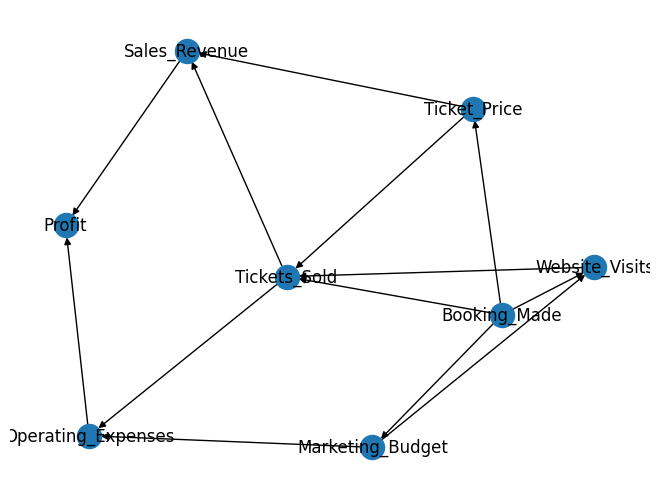

In [62]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

features = [
    "Booking_Made",
    "Website_Visits",
    "Ticket_Price",
    "Tickets_Sold",
    "Sales_Revenue",
    "Operating_Expenses",
    "Marketing_Budget",
    "Profit"
]

G.add_nodes_from(features)

causal_edges = [
    ("Booking_Made", "Marketing_Budget"),
    ("Booking_Made", "Website_Visits"),
    ("Booking_Made", "Tickets_Sold"),
    ("Booking_Made", "Ticket_Price"),
    ("Marketing_Budget", "Website_Visits"),
    ("Marketing_Budget", "Operating_Expenses"),
    ("Website_Visits", "Tickets_Sold"),
    ("Ticket_Price", "Tickets_Sold"),
    ("Ticket_Price", "Sales_Revenue"),
    ("Tickets_Sold", "Sales_Revenue"),
    ("Tickets_Sold", "Operating_Expenses"),
    ("Sales_Revenue", "Profit"),
    ("Operating_Expenses", "Profit")
]

G.add_edges_from(causal_edges)

pos = nx.spring_layout(G,k=2,iterations=500)

nx.draw(G, pos, with_labels=True)


plt.show()

In [8]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import scipy.stats as stats

df = pd.read_csv('/content/train_data.csv')

def fit_model(target, causes, data):
    X = data[causes]
    y = data[target]
    model = LinearRegression()
    model.fit(X, y)
    return model

causal_relations = {
    "Marketing_Budget": ["Booking_Made"],
    "Website_Visits": ["Booking_Made", "Marketing_Budget"],
    "Tickets_Sold": ["Booking_Made", "Website_Visits", "Ticket_Price"],
    "Ticket_Price": ["Booking_Made"],
    "Sales_Revenue": ["Ticket_Price", "Tickets_Sold"],
    "Operating_Expenses": ["Marketing_Budget", "Tickets_Sold"],
    "Profit": ["Sales_Revenue", "Operating_Expenses"]
}

models = {}
residuals = {}

for target, causes in causal_relations.items():
    model = fit_model(target, causes, df)
    models[target] = model
    predictions = model.predict(df[causes])
    residuals[target] = predictions - df[target]

# Print the coefficients and intercepts with 2 decimal places
for target, causes in causal_relations.items():
    model = models[target]
    coeffs = model.coef_
    intercept = model.intercept_

    equation = f"{target} = "
    equation += " + ".join([f"{coeff:.2f}*{cause}" for coeff, cause in zip(coeffs, causes)])
    equation += f" + {intercept:.2f}"

    print(equation)
print('Noise distributions:')
# Calculate the distribution of residuals
for target, res in residuals.items():
    # Fit a normal distribution to the residuals
    mu, std = stats.norm.fit(res)
    print(f"Residuals for {target}: Normal distribution with mean = {mu:.2f}, std = {std:.2f}")


Marketing_Budget = 1368.01*Booking_Made + 1298.81
Website_Visits = 7699.75*Booking_Made + 0.50*Marketing_Budget + 11090.27
Tickets_Sold = 764.69*Booking_Made + 0.27*Website_Visits + -5.02*Ticket_Price + 4206.54
Ticket_Price = -92.02*Booking_Made + 999.82
Sales_Revenue = 6118.32*Ticket_Price + 1001.81*Tickets_Sold + -6121790.91
Operating_Expenses = 1.00*Marketing_Budget + 500.00*Tickets_Sold + 500011.10
Profit = 1.00*Sales_Revenue + -1.00*Operating_Expenses + -0.00
Noise distributions:
Residuals for Marketing_Budget: Normal distribution with mean = -0.00, std = 120.96342142
Residuals for Website_Visits: Normal distribution with mean = 0.00, std = 320.58535131
Residuals for Tickets_Sold: Normal distribution with mean = -0.00, std = 100.64302289
Residuals for Ticket_Price: Normal distribution with mean = -0.00, std = 10.77455253
Residuals for Sales_Revenue: Normal distribution with mean = 0.00, std = 11858.66310050
Residuals for Operating_Expenses: Normal distribution with mean = 0.00, st

In [63]:

# Fit the linear regression model for Profit
causes = ["Sales_Revenue", "Operating_Expenses"]
X = df[causes]
y = df["Profit"]
profit_model = LinearRegression()
profit_model.fit(X, y)

# Calculate the variance of Profit
profit_variance = np.var(y, ddof=1)

# Calculate the variance of the predictions
predictions = profit_model.predict(X)
predicted_variance = np.var(predictions, ddof=1)

# Calculate the contribution of each ancestor
coefficients = profit_model.coef_
contributions = coefficients ** 2 * X.var(axis=0)
contributions = contributions / contributions.sum()

# Print the results
print(f"Variance of Profit: {profit_variance:.2f}")
print(f"Variance of Predictions: {predicted_variance:.2f}")
print(f"Contribution to variance by Sales_Revenue: {contributions['Sales_Revenue']:.2%}")
print(f"Contribution to variance by Operating_Expenses: {contributions['Operating_Expenses']:.2%}")

Variance of Profit: 62277529945.45
Variance of Predictions: 62277529945.45
Contribution to variance by Sales_Revenue: 74.05%
Contribution to variance by Operating_Expenses: 25.95%


In [53]:
# Fit the linear regression model for Website_Visits
causes = ["Booking_Made", "Marketing_Budget"]
X = df[causes]
y = df["Website_Visits"]
website_visits_model = LinearRegression()
website_visits_model.fit(X, y)

# Calculate the variance of Website_Visits
website_visits_variance = np.var(y, ddof=1)

# Calculate the variance of the predictions
predictions = website_visits_model.predict(X)
predicted_variance = np.var(predictions, ddof=1)

# Calculate the contribution of each ancestor
coefficients = website_visits_model.coef_
contributions = coefficients ** 2 * X.var(axis=0)
contributions = contributions / contributions.sum()

# Print the results
print(f"Variance of Website_Visits: {website_visits_variance:.2f}")
print(f"Variance of Predictions: {predicted_variance:.2f}")
print(f"Contribution to variance by Booking_Made: {contributions['Booking_Made']:.2%}")
print(f"Contribution to variance by Marketing_Budget: {contributions['Marketing_Budget']:.2%}")


Variance of Website_Visits: 2882457.82
Variance of Predictions: 2779400.50
Contribution to variance by Booking_Made: 99.07%
Contribution to variance by Marketing_Budget: 0.93%


In [54]:
# Fit the linear regression model for Tickets_Sold
causes = ["Booking_Made", "Website_Visits", "Ticket_Price"]
X = df[causes]
y = df["Tickets_Sold"]
tickets_sold_model = LinearRegression()
tickets_sold_model.fit(X, y)

# Calculate the variance of Tickets_Sold
tickets_sold_variance = np.var(y, ddof=1)

# Calculate the variance of the predictions
predictions = tickets_sold_model.predict(X)
predicted_variance = np.var(predictions, ddof=1)

# Calculate the contribution of each ancestor
coefficients = tickets_sold_model.coef_
contributions = coefficients ** 2 * X.var(axis=0)
contributions = contributions / contributions.sum()

# Print the results
print(f"Variance of Tickets_Sold: {tickets_sold_variance:.2f}")
print(f"Variance of Predictions: {predicted_variance:.2f}")
print(f"Contribution to variance by Booking_Made: {contributions['Booking_Made']:.2%}")
print(f"Contribution to variance by Website_Visits: {contributions['Website_Visits']:.2%}")
print(f"Contribution to variance by Ticket_Price: {contributions['Ticket_Price']:.2%}")


Variance of Tickets_Sold: 504316.45
Variance of Predictions: 494159.60
Contribution to variance by Booking_Made: 9.39%
Contribution to variance by Website_Visits: 85.99%
Contribution to variance by Ticket_Price: 4.63%


In [55]:
# Fit the linear regression model for Sales_Revenue
causes = ["Ticket_Price", "Tickets_Sold"]
X = df[causes]
y = df["Sales_Revenue"]
sales_revenue_model = LinearRegression()
sales_revenue_model.fit(X, y)

# Calculate the variance of Sales_Revenue
sales_revenue_variance = np.var(y, ddof=1)

# Calculate the variance of the predictions
predictions = sales_revenue_model.predict(X)
predicted_variance = np.var(predictions, ddof=1)

# Calculate the contribution of each ancestor
coefficients = sales_revenue_model.coef_
contributions = coefficients ** 2 * X.var(axis=0)
contributions = contributions / contributions.sum()

# Print the results
print(f"Variance of Sales_Revenue: {sales_revenue_variance:.2f}")
print(f"Variance of Predictions: {predicted_variance:.2f}")
print(f"Contribution to variance by Ticket_Price: {contributions['Ticket_Price']:.2%}")
print(f"Contribution to variance by Tickets_Sold: {contributions['Tickets_Sold']:.2%}")


Variance of Sales_Revenue: 360245939729.55
Variance of Predictions: 360104925498.66
Contribution to variance by Ticket_Price: 3.23%
Contribution to variance by Tickets_Sold: 96.77%


In [56]:
# Fit the linear regression model for Operating_Expenses
causes = ["Marketing_Budget", "Tickets_Sold"]
X = df[causes]
y = df["Operating_Expenses"]
operating_expenses_model = LinearRegression()
operating_expenses_model.fit(X, y)

# Calculate the variance of Operating_Expenses
operating_expenses_variance = np.var(y, ddof=1)

# Calculate the variance of the predictions
predictions = operating_expenses_model.predict(X)
predicted_variance = np.var(predictions, ddof=1)

# Calculate the contribution of each ancestor
coefficients = operating_expenses_model.coef_
contributions = coefficients ** 2 * X.var(axis=0)
contributions = contributions / contributions.sum()

# Print the results
print(f"Variance of Operating_Expenses: {operating_expenses_variance:.2f}")
print(f"Variance of Predictions: {predicted_variance:.2f}")
print(f"Contribution to variance by Marketing_Budget: {contributions['Marketing_Budget']:.2%}")
print(f"Contribution to variance by Tickets_Sold: {contributions['Tickets_Sold']:.2%}")


Variance of Operating_Expenses: 126269673674.89
Variance of Predictions: 126269673637.80
Contribution to variance by Marketing_Budget: 0.00%
Contribution to variance by Tickets_Sold: 100.00%


In [66]:
profit_model.predict([[5594652.87, 4495588.74]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1099064.13036208])